## SDAIA BOOTCAMP 
### PROJECT #1

### Introduction

The dataset we consider here is for property sales in King County, Washington, which runs from Seattle in the North West, to the Okanogan-Wenatchee National Forest in the East. This blog will explore how we can clean and mung this dataset, with a view to performing a multi-variate linear regression model to predict a property’s price.

### Problem Statement

This project will focus on investigating house sales in the King County area and building a model to predict the sale price. Key executives are keen to launch an advertising campaign directed towards home owners in that area who might consider selling their house, focusing on higher-end residential properties. Also, The code within this project will assist stakeholders, i.e. home buyers or real estate agents, in predicting the sale price of King county homes while demonstrating general trends in the market.

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error , make_scorer
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#Reading the data from csv file and having an overview about it
house_df = pd.read_csv("kc_house_data.csv")
house_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'kc_house_data.csv'

In [ ]:
# Inspecting the types of features
house_df.dtypes

In [95]:
house_df['date'] = pd.to_datetime(house_df['date'])

In [96]:
#Checking missing values
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The Data has no missing data at all. Hence, no need to do any imputation to deal with this issue.

In [97]:
house_df.shape

(21613, 21)

This dataset contains 21613 sample with 20 features and 1 predicted value which is the price

### Splitting the data

In [98]:
X = house_df.drop(['price','id' , 'date'] , axis = 1)
y = house_df['price']

In [99]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [100]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [101]:
#Split data into training-validation-testing
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

#training = 0.6 
#validation = 0.2
#testing = 0.2

# Training

### Simple Linear Regression

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_val)
Validation_score = lr.score(X_val,y_val)
R2_score = round(r2_score(lr_pred, y_val) , 3)
MSE = round(mean_squared_error(lr_pred, y_val) , 3)

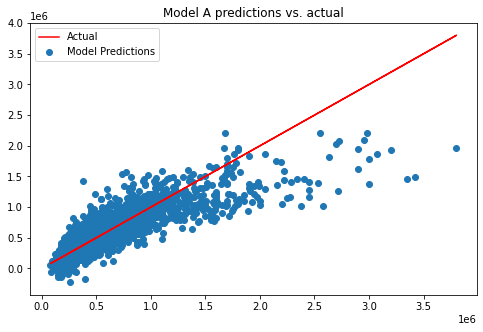

In [103]:
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_val, lr_pred, label='Model Predictions')
plt.plot(y_val, y_val, label='Actual', color='r')
plt.title('Model A predictions vs. actual')
plt.legend()
plt.show()

In [104]:
evaluationtable = pd.DataFrame({'Regressor':["Simple Linear Regression"],'Validation Score':[Validation_score]
                                ,'R-squared':[R2_score],
                                'MSE':[MSE]})

In [105]:
evaluationtable.set_index("Regressor" , inplace = True)

In [106]:
evaluationtable

,Validation Score,R-squared,MSE
Regressor,,,
Simple Linear Regression,0.693457,0.577,3.743211e+10


# Testing

In [107]:
prediction = lr.predict(X_test)
Testing_score = lr.score(X_test,y_test)
R2_score_test = round(r2_score(prediction, y_test) , 3)
MSE_test = round(mean_squared_error(prediction, y_test) , 3)

In [108]:
evaluationtable2 = pd.DataFrame({'Regressor':["Simple Linear Regression"],'Testing Score':[Testing_score]
                                ,'R-squared':[R2_score_test],
                                'MSE':[MSE_test]})
evaluationtable2.set_index("Regressor" , inplace = True)

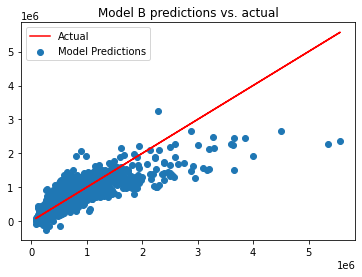

In [109]:
plt.scatter(y_test, prediction, label='Model Predictions')
plt.plot(y_test, y_test, label='Actual', color='r')
plt.title('Model B predictions vs. actual')
plt.legend()
plt.show()

In [110]:
evaluationtable2

,Testing Score,R-squared,MSE
Regressor,,,
Simple Linear Regression,0.700824,0.557,4.522838e+10


# MVS Submittion 

To start exploring this goal, I used a linear regression model with all featyres to predict the price of houses.
The above figures shows the result of one machine learning algorithm used which is "Simple Linear Regression"

The next step of the analysis will be to start doing EDA, cleaning the data and handling the feature selections to achieve a higher R2 result.